**Clustering**

Clustering (unsupervised Learning) adalah mengelompokkan pelanggan berdasarkan data pelanggan di dealer tanpa memperhatikan label kelas apakah pelanggan tertarik untuk membeli kendaraan baru atau tidak. 

In [40]:
# Import Library

import pandas as pd
import numpy as np

# Pengenalan Dataset

- SIM	--> 0 : Tidak punya SIM 1 : Punya SIM
- Kode_Daerah --> Kode area tempat tinggal pelanggan
- Sudah_Asuransi --> 1 : Pelanggan sudah memiliki asuransi kendaraan, 0 : Pelanggan belum memiliki asuransi kendaraan
- Umur_Kendaraan --> Umur kendaraan
- Kendaraan_Rusak --> 1 : Kendaraan pernah rusak sebelumnya. 0 : Kendaraan belum pernah rusak.
- Premi --> Jumlah premi yang harus dibayarkan per tahun.
- Kanal_Penjualan --> Kode kanal untuk menghubungi pelanggan (email, telpon, dll)
- Lama_Berlangganan	--> Sudah berapa lama pelanggan menjadi klien perusahaan
- Tertarik --> 1 : Pelanggan tertarik, 0 : Pelanggan tidak tertarik

Clustring tidak membutuhkan kolom 'Tertarik'

In [41]:
# Membaca file .csv

df = pd.read_csv("kendaraan_train.csv")
df.drop(["Tertarik"], axis=1,  inplace=True) #Clustering tidak membutuhkan kolom 'Tertarik'
df.drop(["id"], axis=1,  inplace=True)

print("Data read into pandas dataframe!")

Data read into pandas dataframe!


# Data Cleaning <a id="0"></a>

In [42]:
# Melihat 5 data teratas dari dataset

df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


In [43]:
# Melihat 5 data terbawah dari dataset

df.tail()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
285826,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0
285827,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0
285828,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0
285829,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0
285830,Pria,45.0,1.0,28.0,0.0,1-2 Tahun,Pernah,36480.0,26.0,44.0


In [44]:
# Melihat ukuran dataset

df.shape

(285831, 10)

In [45]:
# Melihat jenis data dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      271391 non-null  object 
 1   Umur               271617 non-null  float64
 2   SIM                271427 non-null  float64
 3   Kode_Daerah        271525 non-null  float64
 4   Sudah_Asuransi     271602 non-null  float64
 5   Umur_Kendaraan     271556 non-null  object 
 6   Kendaraan_Rusak    271643 non-null  object 
 7   Premi              271262 non-null  float64
 8   Kanal_Penjualan    271532 non-null  float64
 9   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(7), object(3)
memory usage: 21.8+ MB


In [46]:
# Pengecekan data kosong

df.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [47]:
# Menghapus data kosong

df = df.dropna()

In [48]:
# Melakukan cek kembali data kosong

df.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

# Preprocessing <a id="0"></a>

In [49]:
object_column = df.select_dtypes(['object']).columns

category_column = df.select_dtypes(['category']).columns
df[object_column]=df[object_column].apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171068 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Jenis_Kelamin      171068 non-null  category
 1   Umur               171068 non-null  float64 
 2   SIM                171068 non-null  float64 
 3   Kode_Daerah        171068 non-null  float64 
 4   Sudah_Asuransi     171068 non-null  float64 
 5   Umur_Kendaraan     171068 non-null  category
 6   Kendaraan_Rusak    171068 non-null  category
 7   Premi              171068 non-null  float64 
 8   Kanal_Penjualan    171068 non-null  float64 
 9   Lama_Berlangganan  171068 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 10.9 MB


In [50]:
df[object_column] = df[object_column].apply(lambda x: x.cat.codes)
df[category_column] = df[category_column].apply(lambda x: x.cat.codes)

# Clustering K-Means <a id="0"></a>

Akan digunakan 2D Dataset. Kolom yang akan digunakan adalah Premi dan Lama_Berlangganan. Data akan dikelompokan berdasarkan kedua kolom tersebut. Fitur:
- Premi(float): Jumlah premi yang harus dibayarkan per tahun.
- Lama_Berlangganan(float): Sudah berapa lama pelanggan menjadi klien perusahaan

Selanjutnya akan dilakukan plotting data.

In [51]:
#import library

import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
import scipy.spatial.distance as metric
                                            
%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

In [100]:
df.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0
8,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0


In [103]:
corr = df.corr()
corr
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, )

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
Jenis_Kelamin,1.000000,-0.145438,0.018742,-0.002656,0.082809,0.115970,0.092064,-0.003023,0.114058,0.002175
Umur,-0.145438,1.000000,-0.078543,0.044256,-0.256815,-0.525058,-0.269755,0.063838,-0.576009,-0.001032
SIM,0.018742,-0.078543,1.000000,-0.005862,0.016459,0.029913,0.019149,-0.012864,0.041575,0.001739
Kode_Daerah,-0.002656,0.044256,-0.005862,1.000000,-0.024393,-0.027249,-0.026729,-0.012462,-0.043988,-0.003798
Sudah_Asuransi,0.082809,-0.256815,0.016459,-0.024393,1.000000,0.175825,0.826157,0.003988,0.221583,0.002902
Umur_Kendaraan,0.115970,-0.525058,0.029913,-0.027249,0.175825,1.000000,0.176561,0.024222,0.393338,0.001483
Kendaraan_Rusak,0.092064,-0.269755,0.019149,-0.026729,0.826157,0.176561,1.000000,-0.008673,0.226667,0.002023
Premi,-0.003023,0.063838,-0.012864,-0.012462,0.003988,0.024222,-0.008673,1.000000,-0.112297,-0.001260
Kanal_Penjualan,0.114058,-0.576009,0.041575,-0.043988,0.221583,0.393338,0.226667,-0.112297,1.000000,0.000878
Lama_Berlangganan,0.002175,-0.001032,0.001739,-0.003798,0.002902,0.001483,0.002023,-0.001260,0.000878,1.000000


In [97]:
df1 = df[['Umur', 'Premi']].copy()
df1 = df1.drop(df1[df1.Premi == df1.Premi.min()].index)
#data = data.drop(data[data.Premi == data.Premi.min()].index)
df1 = df1[:1000] #Hanya menggunakan 1000 data

Text(0.5, 1.0, 'Visualization of raw data')

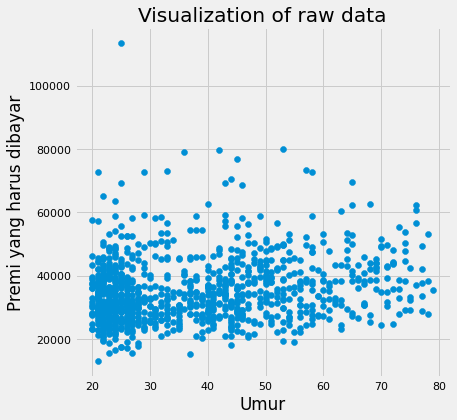

In [96]:
plt.figure(figsize=(6, 6))
plt.scatter(df1.iloc[:, 0], df1.iloc[:, 1])
plt.ylabel('Premi yang harus dibayar')
plt.xlabel('Umur')
plt.title('Visualization of raw data')

Algo Kedua + Elbow Method

In [67]:
def euclidean_dist(A, B):
    return metric.euclidean(A, B)

def plot(data,k,index,centroids,orig_centroids):
    input = []
    for i in range(len(index)):
        for j in index[i]:
            input.append(int(j))
            
    colors = 10*["g","r","c","b","k"]
    j=0
    for i in input:
        plt.scatter(data[j,0], data[j,1], marker="o", color=colors[i], s=50, linewidths=5)
        j+=1

    ## New centroids
    for centroid in range(len(centroids)):
        plt.scatter(centroids[centroid][0],centroids[centroid][1],marker="o", color="k", s=50, linewidths=5)
    
    # Original Clusters
    for centroid in range(len(orig_centroids)):
        plt.scatter(orig_centroids[centroid][0],orig_centroids[centroid][1],marker="D", color="DarkBlue", s=50, linewidths=5)

In [68]:
class K_Means:
    def __init__(self,k,data,centroid_init=None):
        self.k = k
        self.data = data  
        self.centroid_init = centroid_init
        
    def initialise_centroids(self,centroid_init,k,data):
        ## 3 ways to initialize centroides
        if(self.centroid_init == 'random'): 
            initial_centroids = np.random.permutation(data.shape[0])[:self.k]
            self.centroids = data[initial_centroids]
        elif(self.centroid_init == 'firstk'):
            self.centroids = data[:k]
        else:
            for i in range(self.k):
                self.centroids.append(i%self.k)
        return self.centroids    
 
    def fit(self,data):
        m = np.shape(data)[0]
        cluster_assignments = np.mat(np.zeros((m,2)))
        
        cents = self.initialise_centroids(self.centroid_init,self.k,data)
        
        # Preserve original centroids
        cents_orig = cents.copy()
        changed = True
        num_iter = 0
        
        while changed and num_iter < 100:
            changed = False

            # for each row in the dataset
            for i in range(m):

                # Track minimum distance and vector index of associated cluster
                min_dist = np.inf
                min_index = -1

                #calculate distance 
                for j in range(self.k):
                    dist_ji = euclidean_dist(cents[j,:],data[i,:])
                    if(dist_ji < min_dist):
                        min_dist = dist_ji
                        min_index = j
                        
                    # Check if cluster assignment of instance has changed
                    if cluster_assignments[i, 0] != min_index: 
                        changed = True

                # Assign instance to appropriate cluster
                cluster_assignments[i, :] = min_index, min_dist**2

            # Update centroid location
            for cent in range(self.k):
                points = data[np.nonzero(cluster_assignments[:,0].A==cent)[0]]
                cents[cent,:] = np.mean(points, axis=0)
    
            # Count iterations
            num_iter += 1
            #print(num_iter)

         # Return important stuff when done
        return cents, cluster_assignments, num_iter, cents_orig

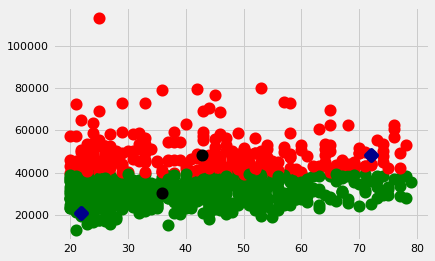

In [95]:
new = df1.to_numpy()
kmeans = K_Means(k=2, data = new, centroid_init='random')
centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(new)
index = cluster_assignments[:,0] ## This has the cluster assignment 0,1,.... 
distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 

k=2
plot(new,k,index,centroids,orig_centroids)

Text(0, 0.5, 'Dispersion')

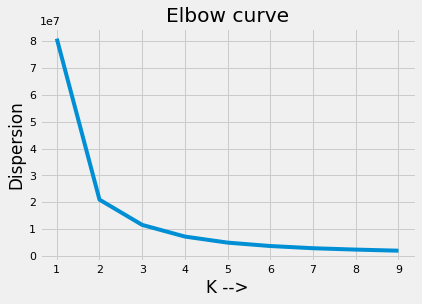

In [94]:
costs = []
for i in range(10):
    kmeans = K_Means(k=i, data = new, centroid_init='firstk')
    centroids, cluster_assignments, iters, orig_centroids = kmeans.fit(new)
    distance = cluster_assignments[:,1]  ## This has the distance from their respective centroides for evaluation purposes 
    cost = sum(distance)/(2*len(new))
    cost = np.array(cost)
    cost = cost.item()
    costs.append(cost)
    
x = np.arange(10)
plt.plot(x,costs)
plt.title("Elbow curve")
plt.xlabel("K")
plt.ylabel("Dispersion")